# **Import Packages and Dataframe**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
energy_production = pd.read_csv("/content/organised_Gen.csv")
energy_production.head()

,Unnamed: 0,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0


# **Data Pre-Processing**

In [ ]:
energy_production.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
#Dataset info
for col in energy_production.columns[:-1]:
  print(col + ":", energy_production[col].unique(), "Total Values: ", len(energy_production[col].unique()))

YEAR: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022] Total Values:  22
MONTH: [ 1  2  3  4  5  6  7  8  9 10 11 12] Total Values:  12
STATE: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'US-TOTAL'] Total Values:  52
TYPE OF PRODUCER: ['Total Electric Power Industry' 'Electric Generators, Electric Utilities'
 'Combined Heat and Power, Electric Power'
 'Combined Heat and Power, Commercial Power'
 'Combined Heat and Power, Industrial Power'
 'Electric Generators, Independent Power Producers'] Total Values:  6
ENERGY SOURCE: ['Coal' 'Petroleum' 'Natural Gas' 'Hydroelectric Conventional' 'Wind'
 'Total' 'Other Gases' 'Nuclear' 'Wood and Wood Derived Fuels'
 'Other Biomass' 'Other' 'Solar Thermal and Photovoltaic' 'P

In [ ]:
#Sum renewable and non-renewable energy sources

renewable_energy_sources = ["Hydroelectric Conventional", "Wind", "Wood and Wood Derived Fuels", "Other Biomass", "Solar Thermal and Photovoltaic", "Geothermal"]
nonrenewable_energy_sources = ["Coal", "Petroleum", "Natural Gas", "Nuclear"]

energy_production["RENEWABLE"] = np.where(energy_production["ENERGY SOURCE"].isin(renewable_energy_sources), "Renewable",
                                 np.where(energy_production["ENERGY SOURCE"].isin(nonrenewable_energy_sources), "Nonrenewable", "Other"))

# **Making Graphs**

<Figure size 1200x600 with 0 Axes>

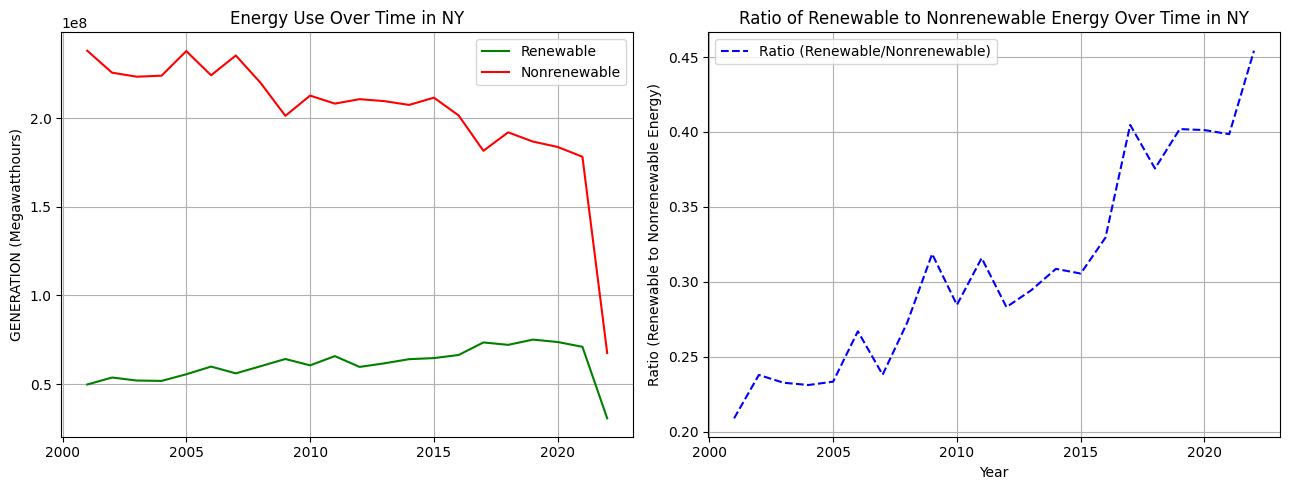

In [ ]:
state = "NY"

# Filter data for state
ny_data = energy_production[energy_production['STATE'] == state]

# Group by year and renewable type, then sum energy values
grouped_data = ny_data.groupby(['YEAR', 'RENEWABLE'])['GENERATION (Megawatthours)'].sum().unstack()

# Plot
plt.figure(figsize=(12, 6))

# Create a 2-row figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5), sharex=True)

# Plot renewable and nonrenewable on the top plot
if 'Renewable' in grouped_data.columns:
    ax1.plot(grouped_data.index, grouped_data['Renewable'], label='Renewable', color='green')

if 'Nonrenewable' in grouped_data.columns:
    ax1.plot(grouped_data.index, grouped_data['Nonrenewable'], label='Nonrenewable', color='red')

ax1.set_title('Energy Use Over Time in ' + state)
ax1.set_ylabel('GENERATION (Megawatthours)')
ax1.grid(True)
ax1.legend()

grouped_data['Ratio'] = grouped_data['Renewable']/grouped_data['Nonrenewable'].replace(0,1)

# Plot the ratio on the bottom plot
ax2.plot(grouped_data.index, grouped_data['Ratio'], label='Ratio (Renewable/Nonrenewable)', color='blue', linestyle='--')
ax2.set_title('Ratio of Renewable to Nonrenewable Energy Over Time in ' + state)
ax2.set_xlabel('Year')
ax2.set_ylabel('Ratio (Renewable to Nonrenewable Energy)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()